# Pandas

pandasはデータ解析・機械学習のためのデータ形式を提供するライブラリです。

特に使うのはDataFrameです。  
DataFrameは行列を扱うクラスで、DataFrameを使えばExcelのSpreadsheetのように見やすいデータ解析ができます。

In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd

::::{admonition} scikit-learnとは  
:class: dropdown

scikit-learn (sklearn)とは、Pythonの機械学習ライブラリのde facto standardだと言える有名なライブラリです。

このライブラリには、有名な機械学習手法を実装したクラスだけでなく、データをダウンロードして読み込む関数や、データの前処理を行う関数などが含まれています。
::::  

## データの読み込み
### sklearnからデータを読み込む

sklearn.datasetsはデータ読み込みパッケージです。

このパッケージの中にはload_\*という関数がいくつか用意されていて、これらの関数を使うとデータセットを読み込むことができます。  
また、この関数で得られるデータセットは辞書型になっています。

- data: データ本体が入っています。型はnp.arrayです。
- target: データのlabel（クラス）が入っています。
- target_names: labelの本当の名前が入っています。
- feature_names: 特徴の名前が入っています。

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### データセットをDataFrameに変形

最も簡単にデータフレームを作るには、np.arrayを渡すだけでOKです。

In [4]:
df = pd.DataFrame(iris.data)
df

0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

毎回こんなに大きいデータフレームを表示するのは格好が悪いので、先頭5行だけを表示するようにします。

In [5]:
df.head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

df.head()はデフォルトで5行、引数に数字を渡すとその分だけ表示する事ができます。

In [5]:
df.head(3)

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2

ちなみにデータフレームの後ろから取ってくる場合はdf.tail()です。

In [6]:
df.tail()

0    1    2    3
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

では、データフレームらしい使い方をしていきましょう。

まずは、特徴がデフォルト機能により勝手にナンバリングされています。  
これを特徴の名前で置き換えましょう。

In [6]:
df.columns = iris.feature_names

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

どうでしょうか。よりわかりやすい表になりましたね。  

また、この表にlabelを追加することもできます。

In [7]:
df2 = df.copy()
df2["label"]=iris.target
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

この表のlabelが数字になっているのは、少しさびしい感じがします。  
数字が実際に表しているlabelの名前を代入してみましょう。

In [8]:
df2["label"] = [iris.target_names[i] for i in iris.target]
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    label  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

ここで使った
```python
[iris.target_names[i] for i in iris.target]
```

という記述。

これはリスト内包表記です。  
リストの中でfor文を書いてリストの要素を生成します。  
普通のfor文の書き方とは違い、forの前に普通for文内で作る要素を書きます。

## データの可視化

### seabornで可視化

pandasのDataFrameは様々な別のライブラリと協調できます。  
データフレームを引数に取る可視化ライブラリ、seabornを使ってみましょう。

In [9]:
import seaborn as sns

seabornはsnsというあだ名にするのが慣例です。

sns.pairplotを使えば、特徴を二つずつセットにして、散布図が作れます。  
hueはクラスを指定します。  
クラスに当たる列の名前を渡しましょう。

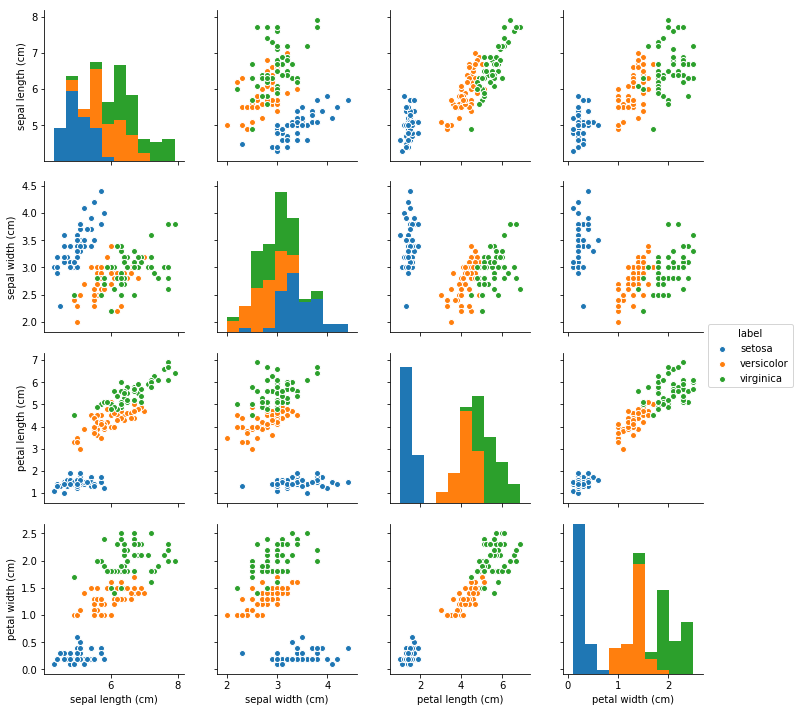

In [11]:
sns.pairplot(df2, hue="label")

### df.plotによる可視化

df.plotメソッドで簡単にプロットができます。

seabornは統計学に特化した可視化ツールですが、plotメソッドでも一般的な可視化ができます。

kind引数に作りたいグラフの名前を入れてあげればOKです。  
ちなみに引数がない場合は曲線になります。  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D4C282470>,
      dtype=object)

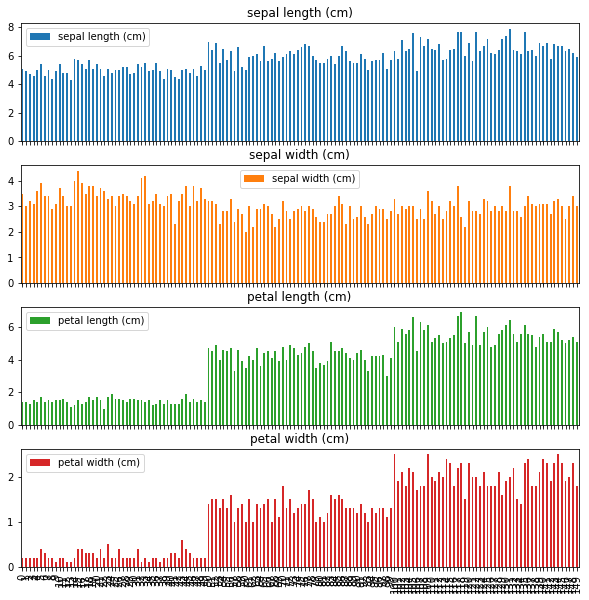

In [12]:
df2.plot(
    kind="bar",      # グラフの種類
    subplots=True,   # subplotsをTrueにすると、列ごとに別のグラフを作れます。この引数を書かなければ一つにまとめられます。
    figsize=(10,10)  # figsizeでプロットサイズを指定できます。この引数を書かなくても適当なサイズで表示されます。
)

## 統計量を計算

### 要約統計量

In [13]:
df2.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

### 相関行列

In [14]:
df2.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.109369           0.871754   
sepal width (cm)           -0.109369          1.000000          -0.420516   
petal length (cm)           0.871754         -0.420516           1.000000   
petal width (cm)            0.817954         -0.356544           0.962757   

                   petal width (cm)  
sepal length (cm)          0.817954  
sepal width (cm)          -0.356544  
petal length (cm)          0.962757  
petal width (cm)           1.000000

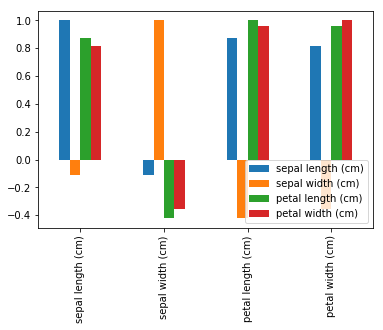

In [15]:
df2.corr().plot(kind="bar")

### 共分散行列

In [16]:
df2.cov()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.039268           1.273682   
sepal width (cm)           -0.039268          0.188004          -0.321713   
petal length (cm)           1.273682         -0.321713           3.113179   
petal width (cm)            0.516904         -0.117981           1.296387   

                   petal width (cm)  
sepal length (cm)          0.516904  
sepal width (cm)          -0.117981  
petal length (cm)          1.296387  
petal width (cm)           0.582414

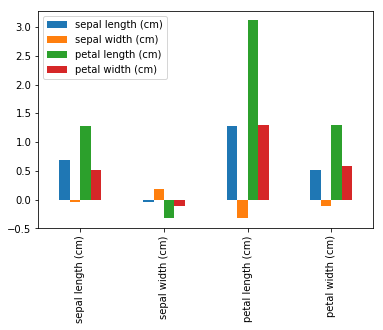

In [17]:
df2.cov().plot(kind="bar")